# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library
##### Generate random geographic coordinates and the nearest city to each latitude and longitude combination is provided

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
pd.DataFrame(data=cities,columns=['City'])


Number of cities in the list: 619


,City
0,porto velho
1,puerto ayora
2,punta arenas
3,hamilton
4,port alfred
...,...
614,alekseyevskoye
615,najran
616,cambyreta
617,dudinka


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    
    #Get weather data
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto velho
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | pindushi
Processing Record 14 of Set 1 | tibati
Processing Record 15 of Set 1 | nongan
Processing Record 16 of Set 1 | arzignano
Processing Record 17 of Set 1 | mednogorsk
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | mahebourg
Processing Record 23 of Set 1 | dun

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,porto velho,-8.7619,-63.9039,296.18,94,0,1.03,BR,1674384129
1,puerto ayora,-0.7393,-90.3518,296.23,97,66,2.23,EC,1674384235
2,punta arenas,-53.1500,-70.9167,277.21,81,0,1.54,CL,1674384235
3,hamilton,39.1834,-84.5333,273.70,83,100,3.09,US,1674384236
4,port alfred,-33.5906,26.8910,294.92,96,100,2.24,ZA,1674384237


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porto velho,-8.7619,-63.9039,296.18,94,0,1.03,BR,1674384129
1,puerto ayora,-0.7393,-90.3518,296.23,97,66,2.23,EC,1674384235
2,punta arenas,-53.1500,-70.9167,277.21,81,0,1.54,CL,1674384235
3,hamilton,39.1834,-84.5333,273.70,83,100,3.09,US,1674384236
4,port alfred,-33.5906,26.8910,294.92,96,100,2.24,ZA,1674384237


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

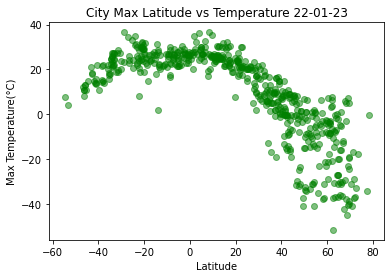

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = round(city_data_df['Max Temp'] - 273.15, 3)
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature {date_dmy}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(°C)")

plt.scatter(x, y, c='g', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

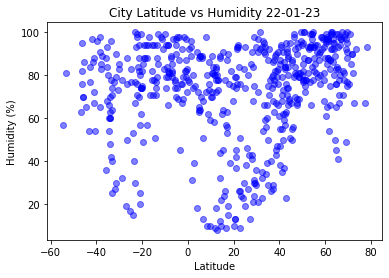

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.title(f"City Latitude vs Humidity {date_dmy}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x, y, c='b', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

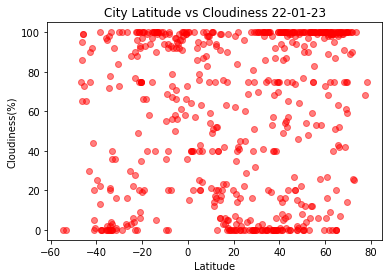

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

plt.title(f"City Latitude vs Cloudiness {date_dmy}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.scatter(x, y, c='r', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

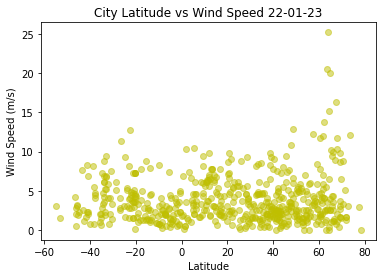

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.title(f"City Latitude vs Wind Speed {date_dmy}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.scatter(x, y, c='y', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
slope, intercept, r, p, std_err = linregress(x=city_data_df['Lat'], y=round(city_data_df['Max Temp'] - 273.15, 3))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hamilton,39.1834,-84.5333,273.70,83,100,3.09,US,1674384236
6,ponta do sol,32.6667,-17.1000,290.50,54,41,4.41,PT,1674384238
11,tuktoyaktuk,69.4541,-133.0374,248.72,95,100,1.59,CA,1674384242
12,pindushi,62.9152,34.5800,265.51,100,99,1.28,RU,1674384243
13,tibati,6.4667,12.6333,305.94,13,87,2.69,CM,1674384244


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porto velho,-8.7619,-63.9039,296.18,94,0,1.03,BR,1674384129
1,puerto ayora,-0.7393,-90.3518,296.23,97,66,2.23,EC,1674384235
2,punta arenas,-53.1500,-70.9167,277.21,81,0,1.54,CL,1674384235
4,port alfred,-33.5906,26.8910,294.92,96,100,2.24,ZA,1674384237
5,busselton,-33.6500,115.3333,300.64,42,0,5.16,AU,1674383867


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8423652276882251


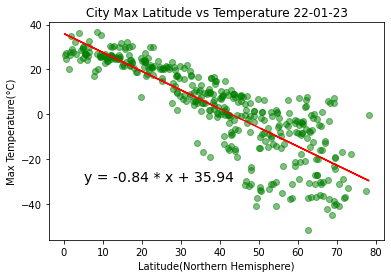

In [16]:
# Linear regression on Northern Hemisphere
slope, intercept, r, p, std_err = linregress(x=northern_hemi_df['Lat'], y=round(northern_hemi_df['Max Temp'] - 273.15, 3))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

x = northern_hemi_df['Lat']
y = round(northern_hemi_df['Max Temp'] - 273.15, 3)
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.scatter(x, y, c='g', alpha=0.5)
plt.plot(x, linearRegression_list,c='r')
plt.title(f"City Max Latitude vs Temperature {date_dmy}")
plt.xlabel("Latitude(Northern Hemisphere)")
plt.ylabel("Max Temperature(°C)")
plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}',(5,-30), fontsize=14)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
print(f'The r-value is: {r}')
plt.show()


The r-value is: 0.5038284763208459


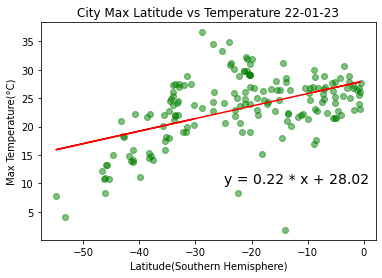

In [18]:
# Linear regression on Southern Hemisphere
slope, intercept, r, p, std_err = linregress(x=southern_hemi_df['Lat'], y=round(southern_hemi_df['Max Temp'] - 273.15, 3))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

x = southern_hemi_df['Lat']
y = round(southern_hemi_df['Max Temp'] - 273.15, 3)
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.scatter(x, y, c='g', alpha=0.5)
plt.plot(x, linearRegression_list,c='r')
plt.title(f"City Max Latitude vs Temperature {date_dmy}")
plt.xlabel("Latitude(Southern Hemisphere)")
plt.ylabel("Max Temperature(°C)")
plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}',(-25,10), fontsize=14)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
print(f'The r-value is: {r}')
plt.show()

**Discussion about the linear relationship:** 
    In Northern Hemisphere, the r-value -0.87 shows that the linear regression model is very fit for explaning the trend of temperature changes. It is obvious that cities near Antarctica is currently experiencing extreme low temperature down to -30°C. The lower latitude in North Hemspohere shows higher temperature.
    In Southern Hemisphere, temperature demostrate increase continuousely when latitude is decrease. This means cities near equator are experiencing higher temperature than where the cities are far away from equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39747832794657056


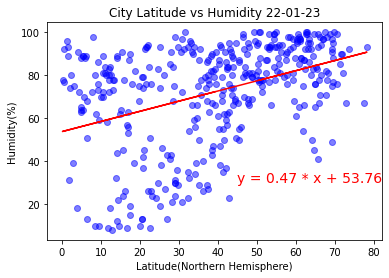

In [20]:
# Northern Hemisphere
slope, intercept, r, p, std_err = linregress(x=northern_hemi_df['Lat'], y=round(northern_hemi_df['Humidity']))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.scatter(x, y, c='b', alpha=0.5)
plt.plot(x, linearRegression_list,c='r')
plt.title(f"City Latitude vs Humidity {date_dmy}")
plt.xlabel("Latitude(Northern Hemisphere)")
plt.ylabel("Humidity(%)")
plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}',(45,30), fontsize=14,c='r')

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
print(f'The r-value is: {r}')
plt.show()

The r-value is: 0.24042266475233315


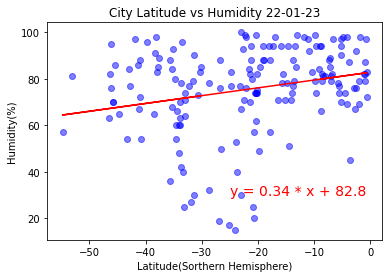

In [22]:
# Southern Hemisphere
slope, intercept, r, p, std_err = linregress(x=southern_hemi_df['Lat'], y=round(southern_hemi_df['Humidity']))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.scatter(x, y, c='b', alpha=0.5)
plt.plot(x, linearRegression_list,c='r')
plt.title(f"City Latitude vs Humidity {date_dmy}")
plt.xlabel("Latitude(Sorthern Hemisphere)")
plt.ylabel("Humidity(%)")
plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}',(-25,30), fontsize=14,c='r')

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
print(f'The r-value is: {r}')
plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere, the r-value -0.49. The scatter dots is centerized in the high level of humidity (80% or more), when the latitute N is more than 40. The scatter dots shows decenterized in the area between 
equater to 40 degrees north of the latitude. The linear regression demostrates the humidity rate slightly increase when the latitude degree is going up in the north hemisphere. 
    In Southern Hemisphere, the r-value is only 0.29. This may show that the linear regression may not be the best option to demostrate the correlation between humidity and latitude. Cities in tropical area located in lower latitude degree in the South is more humid than whose cities located in higher south latitude degree.
   

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24528386099664432


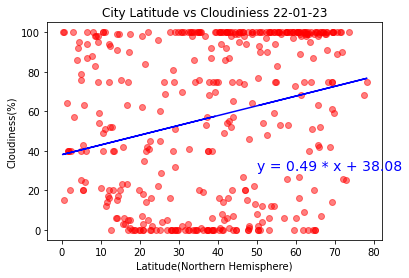

In [24]:
# Northern Hemisphere
slope, intercept, r, p, std_err = linregress(x=northern_hemi_df['Lat'], y=round(northern_hemi_df['Cloudiness']))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.scatter(x, y, c='r', alpha=0.5)
plt.plot(x, linearRegression_list,c='b')
plt.title(f"City Latitude vs Cloudiniess {date_dmy}")
plt.xlabel("Latitude(Northern Hemisphere)")
plt.ylabel("Cloudiness(%)")
plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}',(50,30), fontsize=14,c='b')

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
print(f'The r-value is: {r}')
plt.show()

The r-value is: 0.39501475791208884


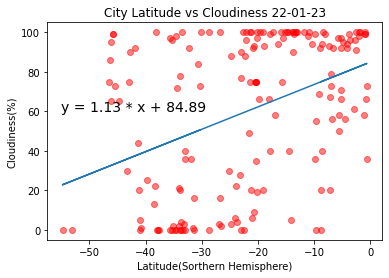

In [26]:
# Southern Hemisphere
slope, intercept, r, p, std_err = linregress(x=southern_hemi_df['Lat'], y=round(southern_hemi_df['Cloudiness']))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.scatter(x, y, c='r', alpha=0.5)
plt.plot(x, linearRegression_list)
plt.title(f"City Latitude vs Cloudiness {date_dmy}")
plt.xlabel("Latitude(Sorthern Hemisphere)")
plt.ylabel("Cloudiness(%)")
plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}',(-55,60), fontsize=14)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
print(f'The r-value is: {r}')
plt.show()

**Discussion about the linear relationship:** 
The r-value is 0.38 in Northern Hemisphere and 0.41 in Souther Hemisphere. Both of scatter dots shows decenterized overall. The cloudiness rate is so high in some cities in both around equator and antartica. The linear slope is contiously increase positively.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.047760827644015444


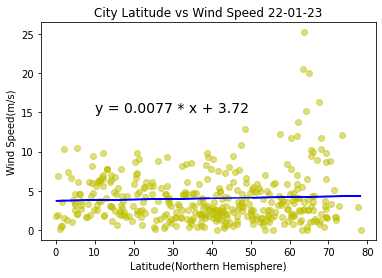

In [28]:
# Northern Hemisphere
slope, intercept, r, p, std_err = linregress(x=northern_hemi_df['Lat'], y=round(northern_hemi_df['Wind Speed']))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.scatter(x, y, c='y', alpha=0.5)
plt.plot(x, linearRegression_list,c='b')
plt.title(f"City Latitude vs Wind Speed {date_dmy}")
plt.xlabel("Latitude(Northern Hemisphere)")
plt.ylabel("Wind Speed(m/s)")
plt.annotate(f'y = {round(slope,4)} * x + {round(intercept,2)}',(10,15), fontsize=14)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
print(f'The r-value is: {r}')
plt.show()

The r-value is: -0.21866641012819613


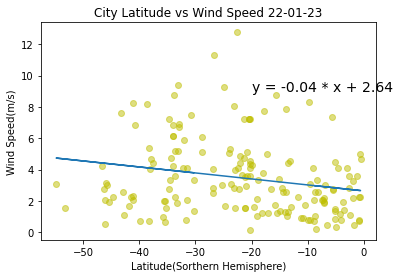

In [30]:
# Southern Hemisphere
slope, intercept, r, p, std_err = linregress(x=southern_hemi_df['Lat'], y=round(southern_hemi_df['Wind Speed']))

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
date = int(city_data_df['Date'][0])
date_dmy = datetime.utcfromtimestamp(date).strftime('%d-%m-%y')

# Incorporate the other graph properties
plt.scatter(x, y, c='y', alpha=0.5)
plt.plot(x, linearRegression_list)
plt.title(f"City Latitude vs Wind Speed {date_dmy}")
plt.xlabel("Latitude(Sorthern Hemisphere)")
plt.ylabel("Wind Speed(m/s)")
plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}',(-20,9), fontsize=14)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
print(f'The r-value is: {r}')
plt.show()

**Discussion about the linear relationship:** 
The wind speed shows very stable in average 3m/s in Northern Hemisphere. It records high wind speed in some cities located in between 20 to 30 degree south. The overall wind speed drop when the lantitude degree decrease in Southern Hemisphere.